<a href="https://colab.research.google.com/github/jhoynoski/Breast_Cancer_Predictors/blob/main/Breast_Cancer_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates how to build, evaluate, and compare multiple classifiers on the sklearn breast cancer dataset. The workflow includes data cleaning, outlier handling, visualization, and model evaluation.

#Installing Required Libraries

Google colab is a great platform that comes preloaded with a variety of libraries that are ready to use. However, we still need one tool from the library *datasist*.  

In [ ]:
try:
  !pip install datasist
except:
  pass

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

from google.colab import data_table
data_table.enable_dataframe_formatter()

# Data Exploration

Loading the dataset  into a dataframe to better visualize the data itself. I prefer to use the google colab DataTable functions because it will allow me to quickly filter and search through the dataset. First lets get basic dataset descriptors such as count, mean, and distribution.


In [ ]:
bc_data = datasets.load_breast_cancer(as_frame=True)
bc_data.data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Overall, the dataset looks clean! The datasets provided on sklearn are supposed to be clean and ready to use, but it's always good to verify that. Now let's make sure there is no null or duplicate data points that need to be addressed.

In [ ]:
# Data inspection
print("Null values:", bc_data.data.isnull().sum().sum())
print("Duplicate values:", bc_data.data.duplicated().sum())

Null values: 0
Duplicate values: 0


Now lets take care of any outliers. Outliers are being defined as data points that are below 25% or above 75% of the median of that column. Data points that meet that criteria will be replaced with the median. The output will be saved as a new dataset.

> Add blockquote



In [ ]:
pd.options.mode.copy_on_write = True

"Replaces outliers in numerical columns with median values using IQR method."
def replace_outliers_with_median(df):
    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        median = df[column].median()
        df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df

bc_data_cleaned = replace_outliers_with_median(bc_data.data.copy())
bc_data_cleaned.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,13.767028,19.075589,89.726643,557.459402,0.095934,0.098003,0.077140,0.044615,0.179083,0.061947,...,15.410877,25.496696,102.456960,688.346749,0.131593,0.230114,0.255058,0.114606,0.280527,0.080770
std,2.997031,3.952084,20.890767,203.091610,0.013031,0.042622,0.061265,0.032462,0.023549,0.005563,...,3.647266,5.837790,26.680427,265.622865,0.021227,0.116390,0.179775,0.065732,0.043140,0.012579
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.027290,0.000000,0.000000,0.160300,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086410,0.064920,0.029560,0.020310,0.162000,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250600,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.270000,21.590000,101.700000,646.100000,0.104900,0.125500,0.112700,0.065970,0.194300,0.065400,...,17.090000,29.410000,115.900000,784.700000,0.145000,0.304600,0.366400,0.161400,0.308000,0.088320
max,21.100000,29.430000,143.000000,1145.000000,0.132600,0.220400,0.244800,0.140100,0.241900,0.077510,...,24.860000,41.850000,172.000000,1493.000000,0.187800,0.564600,0.743600,0.291000,0.399300,0.116800


Now that we've verified the dataset is clean, time to visualize the dataset by creating histograms for each column in our dataframe. The returned array from the hist function has been suppressed since the columns of the dataframe are known.

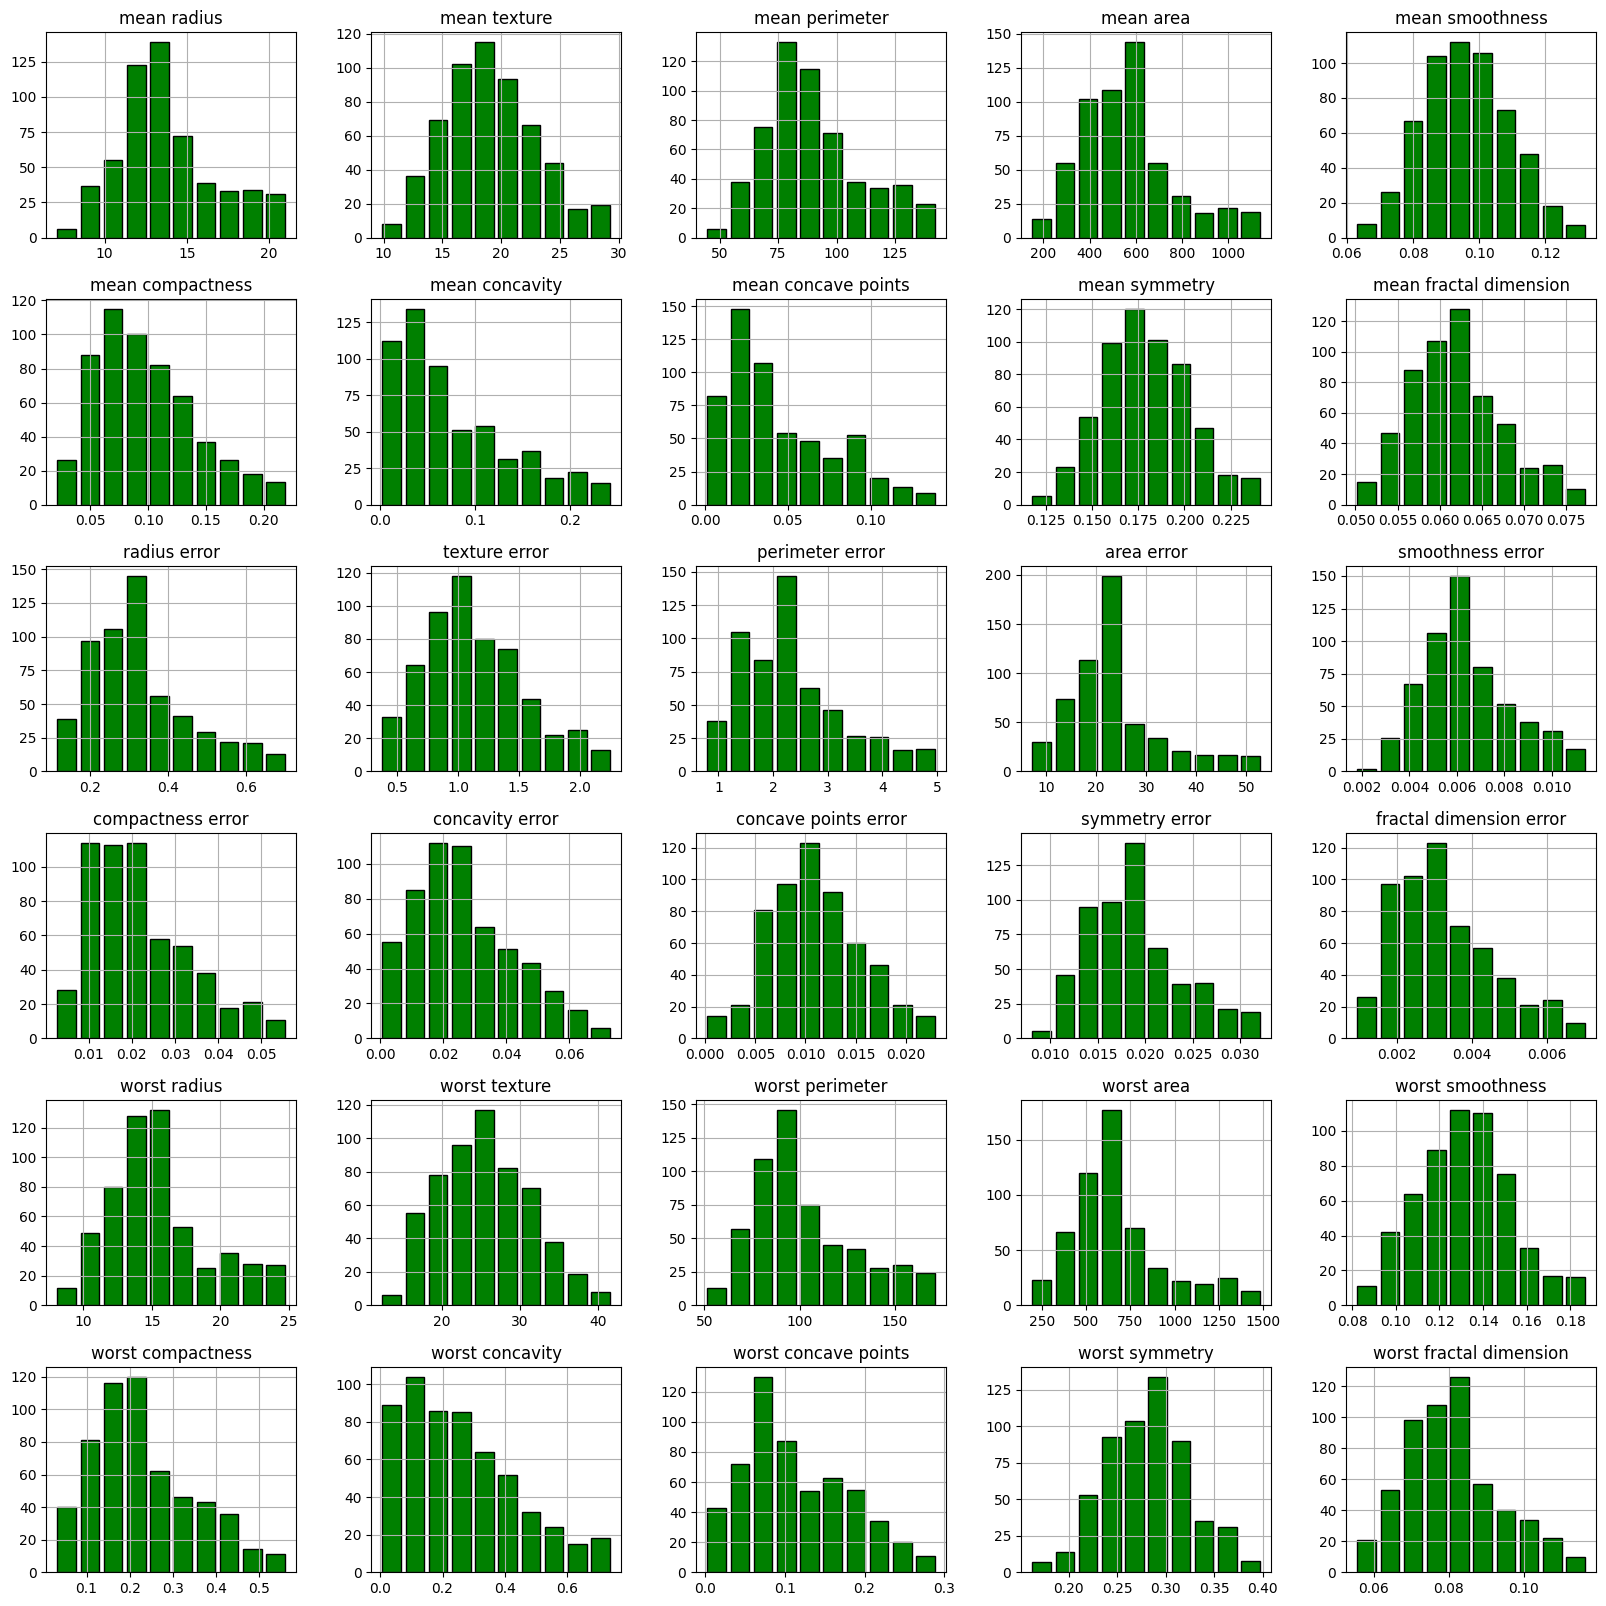

In [ ]:
bc_data_cleaned.hist(figsize=(20,20),edgecolor='black', rwidth=0.8, color='green');

# Modeling Data

Now that our dataset is ready to use, time to prepare it for modeling! The first step is to separate the data into sections that will allow us to both train our machine learning models and test them. First we will separate the dataset into X and y, with X being the features dataset we created without outliers and y being our target data.

In [ ]:
X = bc_data_cleaned
y = bc_data.target

print("X Shape:", X.shape)
print("Y Shape: ", y.shape)

X Shape: (569, 30)
Y Shape:  (569,)


We printed the shapes for X and y to confirm that we have labels (y) for all of our feature data (X). Since this is true, we can proceed with splitting our data further into the train and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now we're going to create two lists. The first is called *names* and will provide all of the names of the classifiers we are going to use and compare. The second list is called *classifiers* and will contain/initialize all of the classifiers we will be using.

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [KNeighborsClassifier(n_neighbors=3),
              SVC(kernel="linear", C=0.025, random_state=42),
              SVC(gamma=2, C=1, random_state=42),
              GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
              DecisionTreeClassifier(max_depth=5, random_state=42),
              RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
              MLPClassifier(alpha=1, max_iter=1000, random_state=42),
              AdaBoostClassifier(random_state=42),
              GaussianNB(),
              QuadraticDiscriminantAnalysis(reg_param = 0.1)]

Now we are going to initialize a figure to plot all of the data from each classifier and create our min and max values for X and y for positional purposes for appending text to the figure.

Next we are going to create a loop that will run each classifier and create a scatter plot of the results. This loop will also append the result from sklearn's score function for every classifier.

KNeighborsClassifier(n_neighbors=3) 
 [[43  4]
 [ 4 63]]
SVC(C=0.025, kernel='linear', random_state=42) 
 [[45  2]
 [ 3 64]]
SVC(C=1, gamma=2, random_state=42) 
 [[ 0 47]
 [ 0 67]]


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: Converg

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42) 
 [[ 0 47]
 [ 0 67]]
DecisionTreeClassifier(max_depth=5, random_state=42) 
 [[42  5]
 [ 3 64]]
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10,
                       random_state=42) 
 [[42  5]
 [ 6 61]]
MLPClassifier(alpha=1, max_iter=1000, random_state=42) 
 [[45  2]
 [ 4 63]]
AdaBoostClassifier(random_state=42) 
 [[45  2]
 [ 1 66]]
GaussianNB() 
 [[45  2]
 [ 8 59]]
QuadraticDiscriminantAnalysis(reg_param=0.1) 
 [[38  9]
 [ 1 66]]


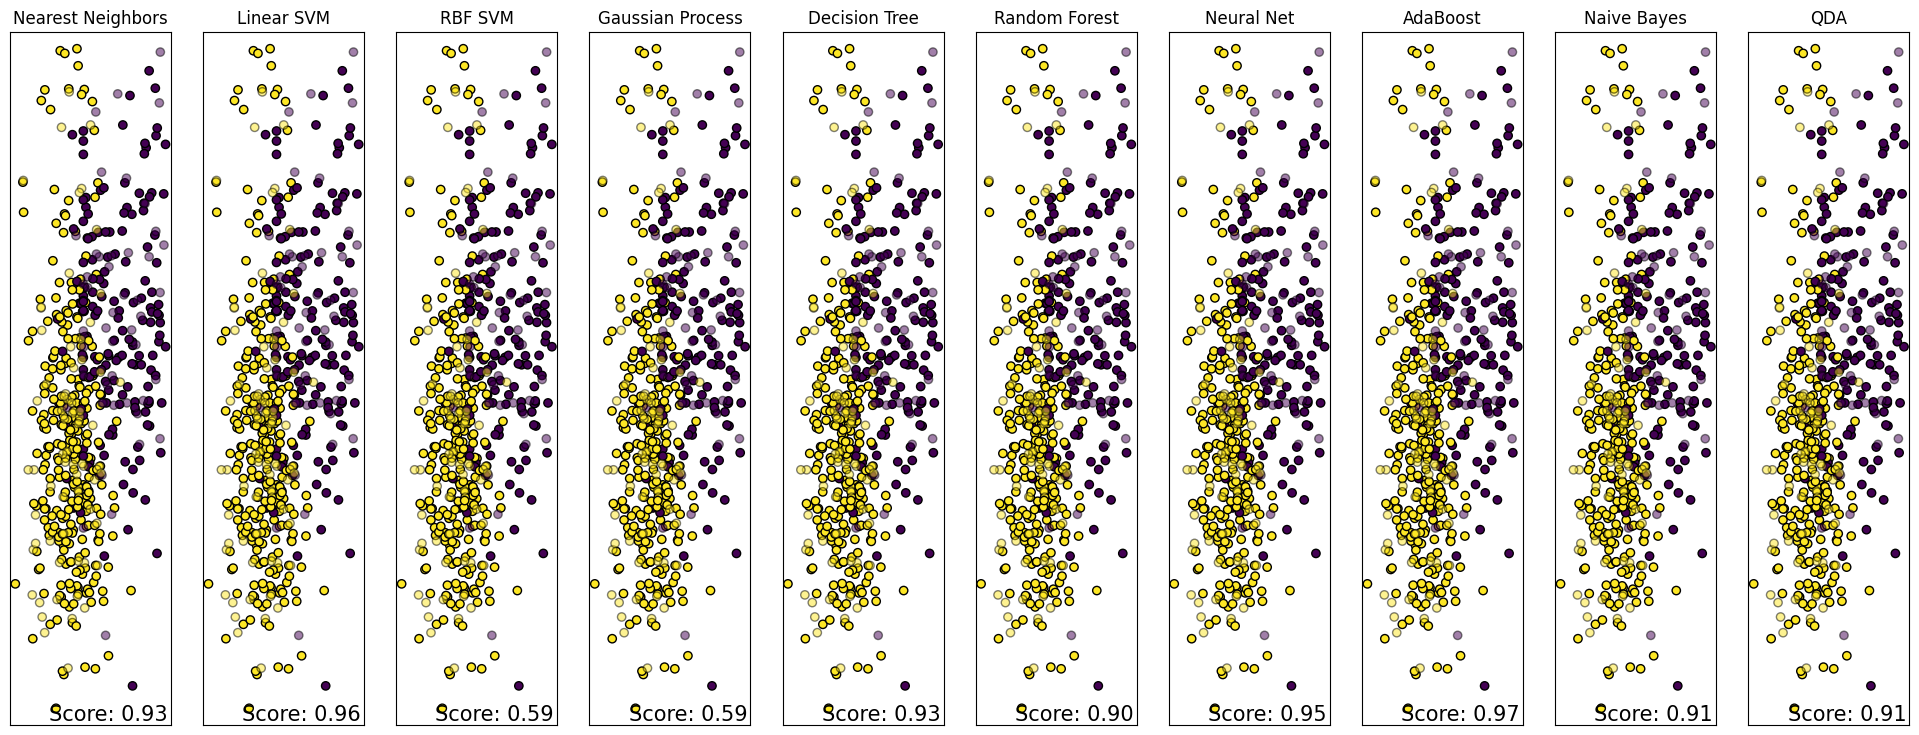

In [ ]:
# Initialize the figure
figure = plt.figure(figsize=(27, 9))

x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5

# Create loop that scales and runs data through each classifier while plotting the results.
acc_scores = []
cvs = []
i=1
for name, model in zip(names, classifiers):
  ax = plt.subplot(1, len(classifiers) + 1, i)

  pipe = make_pipeline(StandardScaler(), model)
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  acc_scores.append(acc)

  cv = cross_val_score(pipe, X, y, cv=5)
  cvs.append(cv)

  print(classifiers[i-1], "\n", confusion_matrix(y_test, y_pred))

  #Plot the training points
  ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.colormaps['viridis'], edgecolors="k")
  # Plot the testing points
  ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.colormaps['viridis'], edgecolors="k", alpha=0.5)
  # Setting up the parameters for the graphs
  ax.set_xlim(x_min, x_max)
  ax.set_ylim(y_min, y_max)
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(name)
  # Adding the score to the figures
  ax.text(x_max - 0.3, y_min + 0.3, ("Score: %.2f" % acc_scores[i-1]).lstrip("0"), size=15, verticalalignment='center', horizontalalignment="right")

  i+=1

plt.show()

It appears that most of the classifiers did well with the exceptions of the RBF Support Vector Machine and Gaussian Process classifiers.The confusion matrix tells us how the classifier predicted the data points and the results for the RBG SVM and the Gaussian Process classifiers show that the low scores were due to predicting the opposite of the targets for the data hence the ~50% scores.

To visualize how the classifiers performed, the accuracy and cross validation scores have been plotted below.

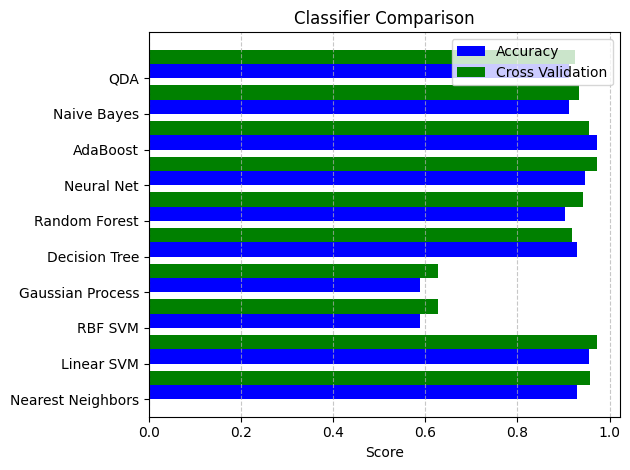

In [ ]:
ax = plt.subplot()
bar_width = 0.2

x = np.arange(len(names))
mean_cvs = [np.mean(scores) for scores in cvs]

ax.barh(x + bar_width, acc_scores, height = 0.4, label = 'Accuracy', color = 'blue')
ax.barh(x + bar_width*3, mean_cvs, height = 0.4, label = 'Cross Validation', color = 'green')
ax.set_yticks(x, names)
ax.set_xlabel("Score")
ax.set_title("Classifier Comparison")
ax.grid(True, axis='x', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()

This next bit was just for fun to practice a little bit of formatting. The goal was to print the label prediction assigned to a specimen by the linear SVC classifier.

In [ ]:
# Using the last 10 samples, run the linear SVC classifier and print their predictions.
input = X[559:].values
SVC_model = SVC(kernel="linear", C=0.025, random_state=42)
SVC_model.fit(X_train, y_train)
SVC_predict = SVC_model.predict(input)
print(SVC_predict)

# Print the predictions as either benign or malignant
for i in range (len(SVC_predict)):
  if SVC_predict[i] == 0:
    print(f'Index {i}: ', "Benign")
  else:
    print(f'Index {i}: ', "Malignant")
  i += 1

[1 1 1 0 0 0 0 0 0 1]
Index 0:  Malignant
Index 1:  Malignant
Index 2:  Malignant
Index 3:  Benign
Index 4:  Benign
Index 5:  Benign
Index 6:  Benign
Index 7:  Benign
Index 8:  Benign
Index 9:  Malignant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
